<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Toma de decisiones estadísticas III}$$

_Autores:_

*   Gustavo Mallqui
___

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Pruebas Paramétricas**

### **Muestras Independientes**

#### **Prueba T muestras independientes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [ ]:
datos = pd.read_csv("births.csv", sep=',')
datos.head(4)

,nro,f_age,m_age,weeks,premature,visits,gained,weight,sex_baby,smoke
0,0,31.0,30,39,full term,13.0,1.0,6.88,male,smoker
1,1,34.0,36,39,full term,5.0,35.0,7.69,male,nonsmoker
2,2,36.0,35,40,full term,12.0,29.0,8.88,male,nonsmoker
3,3,41.0,40,40,full term,13.0,30.0,9.00,female,nonsmoker


Hipótesis

H0 : no hay diferencia entre las medias poblacionales:  μ(smoker)−μ(nonsmoker)=0
 
Ha : si hay diferencia entre las medias poblacionales:  μ(smoker)−μ(nonsmoker)≠0
 


In [ ]:
# Número de observaciones por grupo
# ==============================================================================
datos.groupby('smoke').size()

smoke
nonsmoker    100
smoker        50
dtype: int64

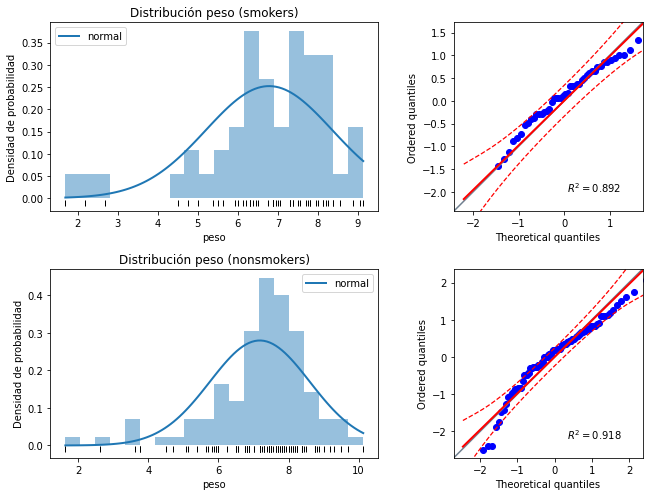

In [ ]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_smokers = datos.loc[datos.smoke == 'smoker', 'weight']
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_smokers)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_smokers), max(peso_smokers), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=peso_smokers, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(peso_smokers, np.full_like(peso_smokers, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución peso (smokers)')
axs[0, 0].set_xlabel('peso')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(peso_smokers, dist='norm', ax=axs[0, 1])

peso_nonsmokers = datos.loc[datos.smoke == 'nonsmoker', 'weight']
mu, sigma = stats.norm.fit(peso_nonsmokers)
x_hat = np.linspace(min(peso_nonsmokers), max(peso_nonsmokers), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=peso_nonsmokers, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(peso_nonsmokers, np.full_like(peso_nonsmokers, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución peso (nonsmokers)')
axs[1, 0].set_xlabel('peso')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(peso_nonsmokers, dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [ ]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=datos, dv='weight', group='smoke')

,W,pval,normal
smoke,,,
smoker,0.894906,0.000328,False
nonsmoker,0.923736,0.000022,False


In [ ]:
# Prueba de kolgomorov-smirnov
# =============================================================================
from scipy import stats
stats.kstest(datos['weight'], 'norm')

KstestResult(statistic=0.9757307565909107, pvalue=1.1467417250608082e-242)

Igualdad de varianza (homocedasticidad)

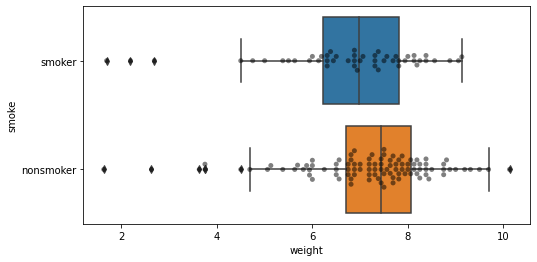

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="smoke", x="weight", data=datos, ax=ax)
sns.swarmplot(y="smoke", x="weight", data=datos, color='black', alpha = 0.5, ax=ax);

In [ ]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=datos, dv='weight', group='smoke')

,W,pval,equal_var
levene,0.444176,0.506151,True


In [ ]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_smokers = datos.loc[datos.smoke == 'smoker', 'weight']
peso_nonsmokers = datos.loc[datos.smoke == 'nonsmoker', 'weight']

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.551676,148,two-sided,0.122876,"[-0.91, 0.11]",0.268758,0.553,0.338075


In [ ]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_smokers = datos.loc[datos.smoke == 'smoker', 'weight']
peso_nonsmokers = datos.loc[datos.smoke == 'nonsmoker', 'weight']

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative='two-sided', correction=True) #cuando se requiere corregir debido a varianzas no homocedasticas

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.496711,89.277413,two-sided,0.137995,"[-0.93, 0.13]",0.268758,0.512,0.338075


### **Muestras emparejadas**

#### **Prueba T muestras emparejadas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [ ]:
datos = pd.DataFrame({
          'corredor': range(1, 11),
          'antes': [12.9, 13.5, 12.8, 15.6, 17.2, 19.2, 12.6, 15.3, 14.4, 11.3],
          'despues': [12.7, 13.6, 12.0, 15.2, 16.8, 20.0, 12.0, 15.9, 16.0, 11.1]
        })

datos.head()

,corredor,antes,despues
0,1,12.9,12.7
1,2,13.5,13.6
2,3,12.8,12.0
3,4,15.6,15.2
4,5,17.2,16.8


In [ ]:
datos['diferencia'] = datos['antes'] - datos['despues']
datos.head()

,corredor,antes,despues,diferencia
0,1,12.9,12.7,0.2
1,2,13.5,13.6,-0.1
2,3,12.8,12.0,0.8
3,4,15.6,15.2,0.4
4,5,17.2,16.8,0.4


In [ ]:
datos['diferencia'].describe()

count    10.000000
mean     -0.050000
std       0.741245
min      -1.600000
25%      -0.475000
50%       0.200000
75%       0.400000
max       0.800000
Name: diferencia, dtype: float64

Hipótesis

H0 : no hay diferencia entre el tiempo medio de los corredores al inicio y al final del año. El promedio de las diferencias es cero ( μd=0
 ).

Ha : sí hay diferencia entre el tiempo medio de los corredores al inicio y al final del año. El promedio de las diferencias no es cero ( μd≠0
 ).

In [ ]:
datos

,corredor,antes,despues,diferencia
0,1,12.9,12.7,0.2
1,2,13.5,13.6,-0.1
2,3,12.8,12.0,0.8
3,4,15.6,15.2,0.4
4,5,17.2,16.8,0.4
5,6,19.2,20.0,-0.8
6,7,12.6,12.0,0.6
7,8,15.3,15.9,-0.6
8,9,14.4,16.0,-1.6
9,10,11.3,11.1,0.2


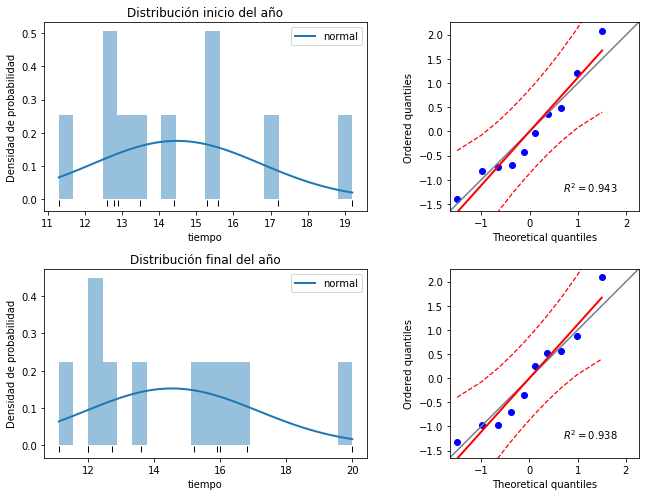

In [ ]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Valores de la media (mu) y desviación típica (sigma)
mu, sigma = stats.norm.fit(datos['antes'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos['antes']), max(datos['antes']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=datos['antes'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(datos['antes'], np.full_like(datos['antes'], -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución inicio del año')
axs[0, 0].set_xlabel('tiempo')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(datos['antes'], dist='norm', ax=axs[0, 1])

mu, sigma = stats.norm.fit(datos['despues'])
x_hat = np.linspace(min(datos['despues']), max(datos['despues']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=datos['despues'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(datos['despues'], np.full_like(datos['despues'], -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución final del año')
axs[1, 0].set_xlabel('tiempo')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(datos['despues'], dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [ ]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=datos['antes'])

,W,pval,normal
antes,0.944436,0.603337,True


In [ ]:
pg.normality(data=datos['despues'])

,W,pval,normal
despues,0.936383,0.513514,True


In [ ]:
# Test para datos dependientes (p-value, intervalos de confianza)
# ==============================================================================

pg.ttest(
    x           = datos['antes'],
    y           = datos['despues'],
    alternative = 'two-sided',
    paired      = True,
    correction  = False
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.213308,9,two-sided,0.83584,"[-0.58, 0.48]",0.019375,0.315,0.050347


## **Pruebas No Paramétricas**

### **Prueba U-Mann Whitney**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [ ]:
# Datos
# ==============================================================================
valores_A = np.array([1.1, 3.4, 4.3, 2.1, 7.0 , 2.5])
valores_B = np.array([7.0, 8.0, 3.0, 5.0, 6.2 , 4.4])
muestra = np.repeat(['A', 'B'], repeats=6)
datos = pd.DataFrame({
            'valor': np.concatenate([valores_A, valores_B]),
            'muestra': muestra
})
datos

,valor,muestra
0,1.1,A
1,3.4,A
2,4.3,A
3,2.1,A
4,7.0,A
5,2.5,A
6,7.0,B
7,8.0,B
8,3.0,B
9,5.0,B


Hipótesis

H0 : la probabilidad de que una observación de la población A sea mayor que una observación de la población B es igual que la probabilidad de que una observación de la población B sea mayor que una observación de la población A.

Ha : la probabilidad de que una observación de la población A sea mayor que una observación de la población B no es igual que la probabilidad de que una observación de la población B sea mayor que una observación de la población A.

In [ ]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=datos, dv='valor', group='muestra', method='levene') #method='bartlett'

,W,pval,equal_var
levene,0.002562,0.960625,True


In [ ]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(x=valores_A, y=valores_B, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,6.5,two-sided,0.077648,0.638889,0.180556


### **Prueba t-Wilcoxon**

In [ ]:
import numpy as np
import pingouin as pg

In [ ]:
x = np.array([20, 22, 19, 20, 22, 18, 24, 20, 19, 24, 26, 13])
y = np.array([38, 37, 33, 29, 14, 12, 20, 22, 17, 25, 26, 16])

In [ ]:
pg.wilcoxon(x, y, alternative='two-sided',correction=False)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,20.5,two-sided,0.266166,-0.378788,0.395833


In [ ]:
import scipy

In [ ]:
scipy.stats.wilcoxon(x, y)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=20.5, pvalue=0.2661660677806492)